# Data Preprocessing

In [1]:
import numpy as np  # Import numpy library for efficient array operations
import pandas as pd  # Import pandas library for data processing
import matplotlib.pyplot as plt  # Import matplotlib.pyplot for data visualization

In [2]:
df = pd.read_csv('dataset\Assignment-1_Data.csv', sep=';',parse_dates=['Date'])

C:\Users\jramy\AppData\Local\Temp\ipykernel_12740\2619054936.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('dataset\Assignment-1_Data.csv', sep=';',parse_dates=['Date'])


In [3]:
df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,"2,75",17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom


In [4]:
# Convert the 'Price' column to float64 data type after replacing commas with dots
df['Price'] = df['Price'].str.replace(',', '.').astype('float64')

In [5]:
# Display the information about the DataFrame which is to provide an overview of the DataFrame's structure and column data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   BillNo      522064 non-null  object 
 1   Itemname    520609 non-null  object 
 2   Quantity    522064 non-null  int64  
 3   Date        522064 non-null  object 
 4   Price       522064 non-null  float64
 5   CustomerID  388023 non-null  float64
 6   Country     522064 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [39]:
df.describe()

,Quantity,Date,Price,CustomerID,Total_Price
count,519550.000000,519550,519550.000000,387985.000000,519550.000000
mean,10.398379,2011-07-04 16:03:24.573958656,3.866610,15317.042994,19.807204
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,0.001000
25%,1.000000,2011-03-28 10:52:00,1.250000,13950.000000,3.750000
50%,3.000000,2011-07-20 11:55:00,2.080000,15265.000000,9.870000
75%,10.000000,2011-10-19 15:08:00,4.130000,16837.000000,17.400000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000,168469.600000
std,157.005103,NaN,32.516631,1721.813298,272.430068


In [54]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Pandas Profiling Report")
profile

c:\Users\jramy\AppData\Local\Programs\Python\Python311\Lib\site-packages\ydata_profiling\profile_report.py:491: DeprecationWarning:

Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
# Calculate the number of missing values for each column and sort them in descending order
df.isna().sum().sort_values(ascending=False)

CustomerID    134041
Itemname        1455
BillNo             0
Quantity           0
Date               0
Price              0
Country            0
dtype: int64

In [7]:
# Calculate the total price by multiplying the quantity and price columns
df['Total_Price'] = df.Quantity * df.Price

In [8]:
df.describe(include='all')

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Total_Price
count,522064.0,520609,522064.000000,522064,522064.000000,388023.000000,522064,522064.000000
unique,21665.0,4185,NaN,19641,NaN,NaN,30,NaN
top,573585.0,WHITE HANGING HEART T-LIGHT HOLDER,NaN,31.10.2011 14:41,NaN,NaN,United Kingdom,NaN
freq,1114.0,2269,NaN,1114,NaN,NaN,487622,NaN
mean,NaN,NaN,10.090435,NaN,3.826801,15316.931710,NaN,19.690633
std,NaN,NaN,161.110525,NaN,41.900599,1721.846964,NaN,273.068938
min,NaN,NaN,-9600.000000,NaN,-11062.060000,12346.000000,NaN,-11062.060000
25%,NaN,NaN,1.000000,NaN,1.250000,13950.000000,NaN,3.750000
50%,NaN,NaN,3.000000,NaN,2.080000,15265.000000,NaN,9.780000
75%,NaN,NaN,10.000000,NaN,4.130000,16837.000000,NaN,17.400000


In [9]:
# Print the number of unique countries in the 'Country' column
print("Number of unique countries:", df['Country'].nunique())

# Calculate and print the normalized value counts of the top 5 countries in the 'Country' column
print(df['Country'].value_counts(normalize=True)[:5])

Number of unique countries: 30
Country
United Kingdom    0.934027
Germany           0.017320
France            0.016105
Spain             0.004760
Netherlands       0.004526
Name: proportion, dtype: float64


In [10]:
# Delete the 'Country' column from the DataFrame
df.drop('Country', axis=1, inplace=True)

In [11]:
# Filter the DataFrame to display rows where 'BillNo' column contains non-digit values
df[df['BillNo'].str.isdigit() == False]

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Total_Price
288772,A563185,Adjust bad debt,1,12.08.2011 14:50,11062.06,NaN,11062.06
288773,A563186,Adjust bad debt,1,12.08.2011 14:51,-11062.06,NaN,-11062.06
288774,A563187,Adjust bad debt,1,12.08.2011 14:52,-11062.06,NaN,-11062.06


In [12]:
# Remove rows where the 'Itemname' column contains "Adjust bad debt"
df = df[df['Itemname'] != "Adjust bad debt"]

In [13]:
# Here to check if all BillNo doesn't inculde letters 
df['BillNo'].astype("int64")

0         536365
1         536365
2         536365
3         536365
4         536365
           ...  
522059    581587
522060    581587
522061    581587
522062    581587
522063    581587
Name: BillNo, Length: 522061, dtype: int64

In [14]:
# Calculate the sum of 'Price' for rows where 'Itemname' is missing
df[df['Itemname'].isna()] ['Price'].sum()

0.0

In [15]:
# Filter the DataFrame to display rows where 'Itemname' is missing
df[df['Itemname'].isna()]

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Total_Price
613,536414,NaN,56,01.12.2010 11:52,0.0,NaN,0.0
1937,536545,NaN,1,01.12.2010 14:32,0.0,NaN,0.0
1938,536546,NaN,1,01.12.2010 14:33,0.0,NaN,0.0
1939,536547,NaN,1,01.12.2010 14:33,0.0,NaN,0.0
1940,536549,NaN,1,01.12.2010 14:34,0.0,NaN,0.0
...,...,...,...,...,...,...,...
515623,581199,NaN,-2,07.12.2011 18:26,0.0,NaN,-0.0
515627,581203,NaN,15,07.12.2011 18:31,0.0,NaN,0.0
515633,581209,NaN,6,07.12.2011 18:35,0.0,NaN,0.0
517266,581234,NaN,27,08.12.2011 10:33,0.0,NaN,0.0


In [16]:
# Filter the DataFrame to display rows where 'Quantity' is less than 1
df[df['Quantity'] < 1]

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Total_Price
2359,536589,NaN,-10,01.12.2010 16:50,0.0,NaN,-0.0
4289,536764,NaN,-38,02.12.2010 14:42,0.0,NaN,-0.0
6998,536996,NaN,-20,03.12.2010 15:30,0.0,NaN,-0.0
6999,536997,NaN,-20,03.12.2010 15:30,0.0,NaN,-0.0
7000,536998,NaN,-6,03.12.2010 15:30,0.0,NaN,-0.0
...,...,...,...,...,...,...,...
515634,581210,check,-26,07.12.2011 18:36,0.0,NaN,-0.0
515636,581212,lost,-1050,07.12.2011 18:38,0.0,NaN,-0.0
515637,581213,check,-30,07.12.2011 18:38,0.0,NaN,-0.0
517209,581226,missing,-338,08.12.2011 09:56,0.0,NaN,-0.0


In [17]:
# Remove rows where 'Quantity' is less than 1
df = df[df['Quantity'] >= 1]

In [18]:
# Select a random sample of 30 rows where 'CustomerID' is missing
df[df['CustomerID'].isna()].sample(30)

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Total_Price
262391,560772,HANGING CHICK CREAM DECORATION,3,20.07.2011 16:12,1.25,NaN,3.75
218574,556803,PARTY BUNTING,46,14.06.2011 14:57,10.79,NaN,496.34
60644,541497,CANDY SPOT CUSHION COVER,2,18.01.2011 15:19,3.29,NaN,6.58
115957,546651,SINGLE HEART ZINC T-LIGHT HOLDER,1,15.03.2011 14:17,2.08,NaN,2.08
402734,572758,SET OF 3 WOODEN HEART DECORATIONS,2,25.10.2011 18:39,2.46,NaN,4.92
70574,542252,FRENCH BLUE METAL DOOR SIGN 8,1,26.01.2011 16:01,2.46,NaN,2.46
37969,539631,POTTERING IN THE SHED METAL SIGN,1,20.12.2010 15:03,4.21,NaN,4.21
18499,537823,MEMO BOARD RETROSPOT DESIGN,1,08.12.2010 14:25,11.02,NaN,11.02
374292,570465,SET 36 COLOURING PENCILS DOILY,2,10.10.2011 16:02,2.46,NaN,4.92
341579,567901,"BIRTHDAY CARD, RETRO SPOT",3,22.09.2011 16:28,0.42,NaN,1.26


In [19]:
# Counting the number of rows where the price is zero
zero_price_count = len(df[df['Price'] == 0])
print("Number of rows where price is zero:", zero_price_count)

# Counting the number of rows where the price is negative
negative_price_count = len(df[df['Price'] < 0])
print("Number of rows where price is negative:", negative_price_count)

Number of rows where price is zero: 1175
Number of rows where price is negative: 0


In [20]:
# Selecting a random sample of 20 rows where the price is zero
df[df['Price'] == 0].sample(20)

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Total_Price
334726,567337,NaN,5,19.09.2011 14:56,0.0,NaN,0.0
307947,564924,NaN,1,31.08.2011 12:44,0.0,NaN,0.0
111929,546139,?,3000,09.03.2011 16:35,0.0,NaN,0.0
40281,539856,SKULL DESIGN TV DINNER TRAY,5,22.12.2010 14:41,0.0,NaN,0.0
154829,550460,did a credit and did not tick ret,1300,18.04.2011 13:18,0.0,NaN,0.0
186878,553539,FRENCH BLUE METAL DOOR SIGN 4,2,17.05.2011 15:27,0.0,NaN,0.0
233705,558340,FRENCH BLUE METAL DOOR SIGN 0,1,28.06.2011 14:01,0.0,NaN,0.0
72550,542512,NaN,2,28.01.2011 12:07,0.0,NaN,0.0
415935,573884,had been put aside,20,01.11.2011 13:25,0.0,NaN,0.0
21245,538136,NaN,2,09.12.2010 15:57,0.0,NaN,0.0


In [21]:
# Remove rows where the price is zero
df = df[df['Price'] != 0]

# Data Analysis

Text(0.5, 0, 'Date (Month)')

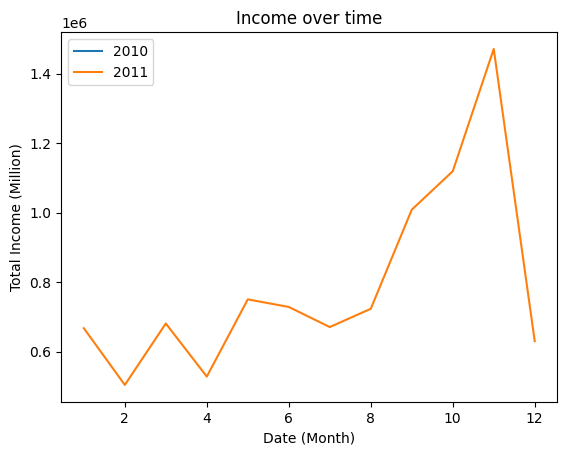

In [22]:
# Grouping the data by month and summing the total price for the year 2010
# Assuming 'Date' column is in a non-standard date format, specify the format
df["Date"] = pd.to_datetime(df['Date'], format="%d.%m.%Y %H:%M")

# Grouping the data by month and summing the total price for the year 2010
df[df["Date"].dt.year == 2010].groupby(df["Date"].dt.month)["Total_Price"].sum().plot()

# Grouping the data by month and summing the total price for the year 2011
df[df["Date"].dt.year == 2011].groupby(df["Date"].dt.month)["Total_Price"].sum().plot()
# Adding legend and plot labels
plt.legend(["2010","2011"])
plt.title("Income over time")
plt.ylabel('Total Income (Million)')
plt.xlabel("Date (Month)")

In [23]:
df["Date"].max()

Timestamp('2011-12-09 12:50:00')

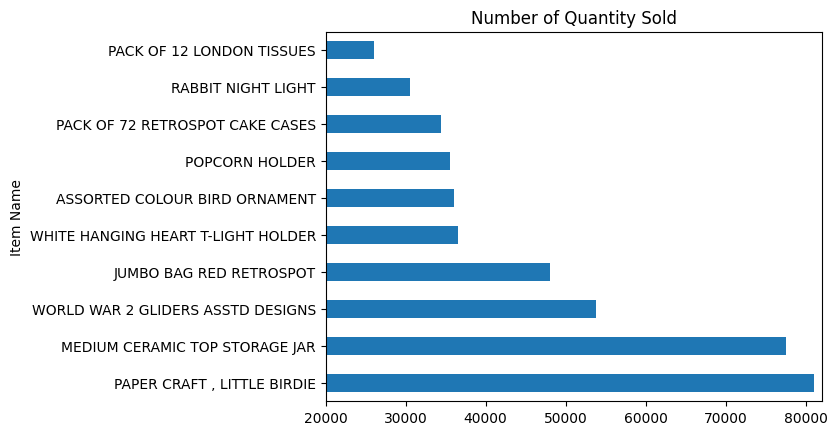

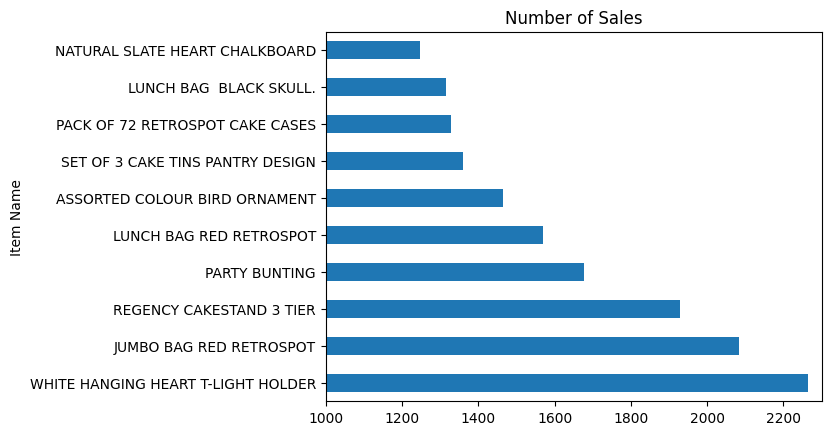

In [24]:
# Plotting the top 10 most sold products by quantity
df.groupby('Itemname')['Quantity'].sum().sort_values(ascending=False)[:10].plot(kind='barh', title='Number of Quantity Sold')
plt.ylabel('Item Name')
plt.xlim(20000, 82000)
plt.show()

# Plotting the top 10 most sold products by count
df['Itemname'].value_counts(ascending=False)[:10].plot(kind='barh', title='Number of Sales')
plt.ylabel('Item Name')
plt.xlim(1000, 2300)
plt.show()

# Association Rules

In [25]:
# Assign the original DataFrame to df2
df2 = df

# Filter rows based on item occurrences
item_counts = df2['Itemname'].value_counts(ascending=False)
filtered_items = item_counts.loc[item_counts > 1].reset_index()
df2 = df2[df2['Itemname'].isin(filtered_items['Itemname'])]

# Filter rows based on bill number occurrences
bill_counts = df2['BillNo'].value_counts(ascending=False)
filtered_bills = bill_counts.loc[bill_counts > 1].reset_index()
df2 = df2[df2['BillNo'].isin(filtered_bills['BillNo'])]

In [26]:
# Create a pivot table using the filtered DataFrame
pivot_table = pd.pivot_table(df2[['BillNo','Itemname']], index='BillNo', columns='Itemname', aggfunc=lambda x: True, fill_value=False)

In [27]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Generate frequent itemsets with minimum support of 0.1 (10%)
frequent_itemsets = apriori(pivot_table, min_support=0.01,use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, "confidence", min_threshold = 0.5)

# Print frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Print association rules
print("\nAssociation Rules:")
rules

Frequent Itemsets:
       support                                           itemsets
0     0.017370                           (10 COLOUR SPACEBOY PEN)
1     0.013751                  (12 MESSAGE CARDS WITH ENVELOPES)
2     0.019653                    (12 PENCIL SMALL TUBE WOODLAND)
3     0.019820              (12 PENCILS SMALL TUBE RED RETROSPOT)
4     0.019597                      (12 PENCILS SMALL TUBE SKULL)
...        ...                                                ...
2467  0.010355  (LUNCH BAG SUKI DESIGN, LUNCH BAG RED RETROSPO...
2468  0.010188  (LUNCH BAG SUKI DESIGN, LUNCH BAG RED RETROSPO...
2469  0.010300  (LUNCH BAG RED RETROSPOT, LUNCH BAG WOODLAND, ...
2470  0.010467  (LUNCH BAG SPACEBOY DESIGN, LUNCH BAG RED RETR...
2471  0.011302  (WOODLAND CHARLOTTE BAG, CHARLOTTE BAG SUKI DE...

[2472 rows x 2 columns]

Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(60 CAKE CASES DOLLY GIRL DESIGN),(PACK OF 72 RETROSPOT CAKE CASES),0.023160,0.071206,0.013028,0.562500,7.899629,0.011378,2.122958,0.894120
1,(60 TEATIME FAIRY CAKE CASES),(PACK OF 72 RETROSPOT CAKE CASES),0.044427,0.071206,0.024218,0.545113,7.655446,0.021054,2.041812,0.909794
2,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE GREEN),0.023216,0.053558,0.015254,0.657074,12.268575,0.014011,2.759906,0.940321
3,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE PINK),0.023216,0.042256,0.011691,0.503597,11.917802,0.010710,1.929369,0.937865
4,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE RED),0.023216,0.057121,0.015811,0.681055,11.923112,0.014485,2.956246,0.937903
...,...,...,...,...,...,...,...,...,...,...
1392,"(CHARLOTTE BAG SUKI DESIGN, CHARLOTTE BAG PINK...","(STRAWBERRY CHARLOTTE BAG, WOODLAND CHARLOTTE ...",0.018261,0.022492,0.011302,0.618902,27.516648,0.010891,2.564981,0.981583
1393,"(STRAWBERRY CHARLOTTE BAG, CHARLOTTE BAG PINK ...","(CHARLOTTE BAG SUKI DESIGN, WOODLAND CHARLOTTE...",0.018094,0.025164,0.011302,0.624615,24.821552,0.010846,2.596899,0.977397
1394,"(STRAWBERRY CHARLOTTE BAG, WOODLAND CHARLOTTE ...","(CHARLOTTE BAG SUKI DESIGN, CHARLOTTE BAG PINK...",0.022492,0.018261,0.011302,0.502475,27.516648,0.010891,1.973247,0.985832
1395,"(CHARLOTTE BAG PINK POLKADOT, WOODLAND CHARLOT...","(STRAWBERRY CHARLOTTE BAG, CHARLOTTE BAG SUKI ...",0.021824,0.018483,0.011302,0.517857,28.017319,0.010898,2.035738,0.985822


In [28]:
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
17,(BEADED CRYSTAL HEART PINK ON STICK),(DOTCOM POSTAGE),0.011469,0.039305,0.011190,0.975728,24.824404,0.010740,39.580626,0.970851
613,"(HERB MARKER CHIVES, HERB MARKER THYME)",(HERB MARKER PARSLEY),0.010411,0.012916,0.010077,0.967914,74.938272,0.009942,30.764113,0.997036
608,"(HERB MARKER CHIVES, HERB MARKER ROSEMARY)",(HERB MARKER PARSLEY),0.010355,0.012916,0.010021,0.967742,74.924917,0.009887,30.599599,0.996977
620,"(HERB MARKER CHIVES, HERB MARKER ROSEMARY)",(HERB MARKER THYME),0.010355,0.012916,0.010021,0.967742,74.924917,0.009887,30.599599,0.996977
1220,"(HERB MARKER PARSLEY, HERB MARKER BASIL, HERB ...",(HERB MARKER THYME),0.010578,0.012916,0.010188,0.963158,74.570009,0.010052,26.792276,0.997137
...,...,...,...,...,...,...,...,...,...,...
26,(RED RETROSPOT CUP),(BLUE POLKADOT CUP),0.021378,0.018038,0.010689,0.500000,27.719136,0.010304,1.963924,0.984981
1156,"(STRAWBERRY CHARLOTTE BAG, RED RETROSPOT CHARL...","(CHARLOTTE BAG PINK POLKADOT, WOODLAND CHARLOT...",0.026834,0.021824,0.013417,0.500000,22.910714,0.012832,1.956352,0.982723
113,(HAND WARMER RED LOVE HEART),(HAND WARMER SCOTTY DOG DESIGN),0.021935,0.030286,0.010968,0.500000,16.509191,0.010303,1.939428,0.960496
147,(LOVE HOT WATER BOTTLE),(HOT WATER BOTTLE KEEP CALM),0.025832,0.042701,0.012916,0.500000,11.709257,0.011813,1.914597,0.938850


In [29]:
rules.sort_values(by='support', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
161,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.067309,0.113963,0.045596,0.677419,5.944214,0.037926,2.746715,0.891795
104,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.056174,0.054170,0.040641,0.723489,13.355912,0.037598,3.420583,0.980188
105,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.054170,0.056174,0.040641,0.750257,13.355912,0.037598,3.779187,0.978111
174,(JUMBO STORAGE BAG SUKI),(JUMBO BAG RED RETROSPOT),0.065583,0.113963,0.040140,0.612054,5.370650,0.032666,2.283921,0.870920
172,(JUMBO SHOPPER VINTAGE RED PAISLEY),(JUMBO BAG RED RETROSPOT),0.064859,0.113963,0.037635,0.580258,5.091639,0.030243,2.110907,0.859335
...,...,...,...,...,...,...,...,...,...,...
609,"(HERB MARKER PARSLEY, HERB MARKER ROSEMARY)",(HERB MARKER CHIVES),0.011691,0.011469,0.010021,0.857143,74.737864,0.009887,6.919719,0.998291
624,(HERB MARKER ROSEMARY),"(HERB MARKER CHIVES, HERB MARKER THYME)",0.013028,0.010411,0.010021,0.769231,73.887289,0.009886,4.288220,0.999487
987,"(LUNCH BAG APPLE DESIGN, LUNCH BAG PINK POLKADOT)",(LUNCH BAG SPACEBOY DESIGN),0.019263,0.063857,0.010021,0.520231,8.146812,0.008791,1.951238,0.894483
673,"(LUNCH BAG RED RETROSPOT, JUMBO BAG BAROQUE B...",(JUMBO BAG RED RETROSPOT),0.014364,0.113963,0.010021,0.697674,6.121948,0.008384,2.930738,0.848846


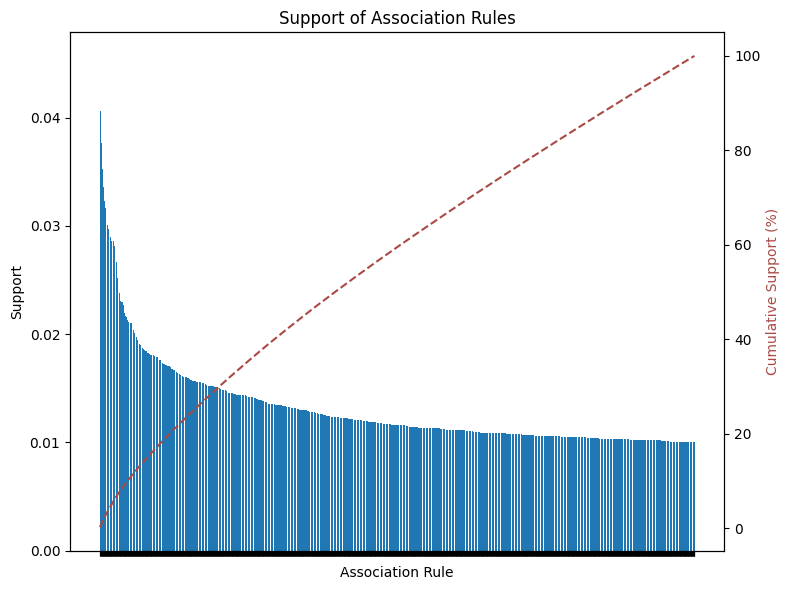

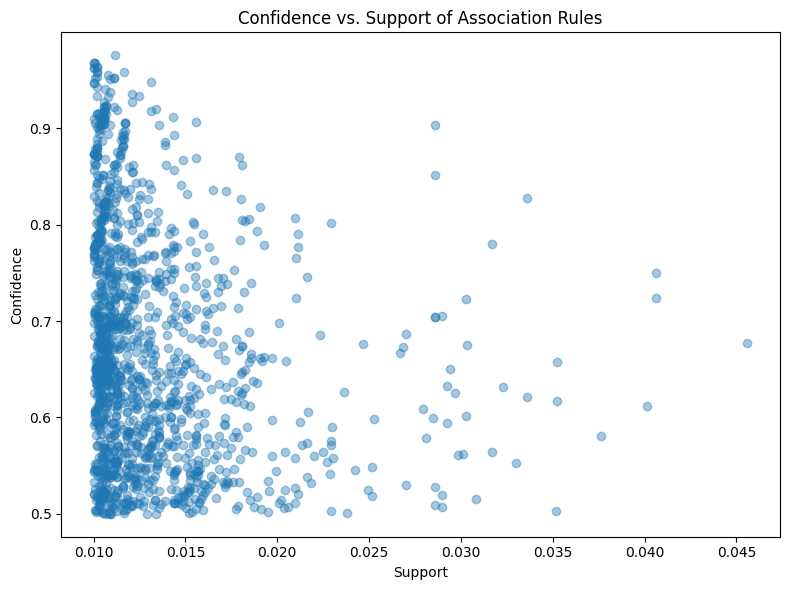

In [41]:
# Sort rules by support in descending order
sorted_rules = rules.sort_values(by='support', ascending=False)

# Calculate cumulative support
cumulative_support = np.cumsum(sorted_rules['support'] / np.sum(sorted_rules['support']) * 100)

# Bar plot for Support
fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.bar(range(len(sorted_rules)), sorted_rules['support'], align='center')
plt.xticks(range(len(sorted_rules)), ['' for _ in range(len(sorted_rules))])  # Remove x-axis labels
ax1.set_xlabel('Association Rule')
ax1.set_ylabel('Support')
ax1.set_title('Support of Association Rules')

# CDF plot for cumulative support
ax2 = ax1.twinx()
ax2.plot(range(len(sorted_rules)), cumulative_support, color='#AA4A44', linestyle='--')
ax2.set_ylabel('Cumulative Support (%)', c='#AA4A44')

plt.tight_layout()
plt.show()

# Scatter plot for Confidence vs. Support
plt.figure(figsize=(8, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.4)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Confidence vs. Support of Association Rules')
plt.tight_layout()
plt.show()

In [56]:
import plotly.express as px

# Convert frozensets to lists for serialization
rules['antecedents'] = rules['antecedents'].apply(list)
rules['consequents'] = rules['consequents'].apply(list)

# Create an interactive scatter plot using plotly express
fig = px.scatter(rules, x="support", y="confidence", size="lift",
                 color="lift", hover_name="consequents",
                 title='Market Basket Analysis - Support vs. Confidence',
                 labels={'support': 'Support', 'confidence': 'Confidence'})

# Customize the layout
fig.update_layout(
    xaxis_title='Support',
    yaxis_title='Confidence',
    coloraxis_colorbar_title='Lift',
    showlegend=True,
    autosize=False,
    width=1200,
    height=850
)

# Show the interactive plot
fig.show()

#### Cross Selling and Up Selling

In [31]:
# Filter association rules for cross-selling opportunities
cross_selling_rules = rules[(rules['antecedents'].apply(len) == 1) & (rules['consequents'].apply(len) == 1)]

# Sort rules based on confidence and support
cross_selling_rules = cross_selling_rules.sort_values(by=['confidence', 'support'], ascending=False)

# Select top cross-selling recommendations
top_cross_selling = cross_selling_rules.head(5)

# Filter association rules for upselling opportunities
upselling_rules = rules[(rules['antecedents'].apply(len) == 1) & (rules['consequents'].apply(len) > 1)]

# Sort rules based on confidence and support
upselling_rules = upselling_rules.sort_values(by=['confidence', 'support'], ascending=False)

# Select top upselling recommendations
top_upselling = upselling_rules.head(5)

# Display cross-selling recommendations
print("Cross-Selling Recommendations:")
for idx, row in top_cross_selling.iterrows():
    antecedent = list(row['antecedents'])[0]
    consequent = list(row['consequents'])[0]
    print(f"Customers who bought '{antecedent}' also bought '{consequent}'.")

# Display upselling recommendations
print("\nUpselling Recommendations:")
for idx, row in top_upselling.iterrows():
    antecedent = list(row['antecedents'])[0]
    consequents = list(row['consequents'])
    print(f"For customers who bought '{antecedent}', recommend the following upgrades: {', '.join(consequents)}.")

Cross-Selling Recommendations:
Customers who bought 'BEADED CRYSTAL HEART PINK ON STICK' also bought 'DOTCOM POSTAGE'.
Customers who bought 'HERB MARKER THYME' also bought 'HERB MARKER ROSEMARY'.
Customers who bought 'HERB MARKER ROSEMARY' also bought 'HERB MARKER THYME'.
Customers who bought 'HERB MARKER CHIVES' also bought 'HERB MARKER PARSLEY'.
Customers who bought 'REGENCY TEA PLATE PINK' also bought 'REGENCY TEA PLATE GREEN'.

Upselling Recommendations:
For customers who bought 'HERB MARKER CHIVES', recommend the following upgrades: HERB MARKER THYME, HERB MARKER PARSLEY.
For customers who bought 'HERB MARKER CHIVES', recommend the following upgrades: HERB MARKER PARSLEY, HERB MARKER MINT.
For customers who bought 'HERB MARKER CHIVES', recommend the following upgrades: HERB MARKER PARSLEY, HERB MARKER ROSEMARY.
For customers who bought 'HERB MARKER CHIVES', recommend the following upgrades: HERB MARKER THYME, HERB MARKER ROSEMARY.
For customers who bought 'HERB MARKER THYME', reco

In [32]:
top_upselling = upselling_rules.sort_values(['confidence', 'support'], ascending=False).drop_duplicates('antecedents')[:5]
for idx, row in top_upselling.iterrows():
    antecedent = list(row['antecedents'])[0]
    consequents = list(row['consequents'])
    print(f"For customers who bought '{antecedent}', recommend the following upgrades: {', '.join(consequents)}.")

For customers who bought 'HERB MARKER CHIVES', recommend the following upgrades: HERB MARKER THYME, HERB MARKER PARSLEY.
For customers who bought 'HERB MARKER THYME', recommend the following upgrades: HERB MARKER PARSLEY, HERB MARKER ROSEMARY.
For customers who bought 'HERB MARKER PARSLEY', recommend the following upgrades: HERB MARKER THYME, HERB MARKER ROSEMARY.
For customers who bought 'HERB MARKER ROSEMARY', recommend the following upgrades: HERB MARKER THYME, HERB MARKER PARSLEY.
For customers who bought 'REGENCY TEA PLATE PINK', recommend the following upgrades: REGENCY TEA PLATE ROSES, REGENCY TEA PLATE GREEN.


In [1]:
!pipreqsnb . --force

pipreqs  --force .


INFO: Successfully saved requirements file in .\requirements.txt
